*à faire*
ajouter un ensemble de validation avec keras

----

# Exploration d'algorithmes avec Python/Tensorflow/Keras

Dans ce notebook Jupyter, nous allons procéder à une analyse exploratoire du potentiel d'apprentissage des réseaux de neurones. 

Le projet est constitué des trois étapes suivantes:

- Générer des données synthétiques à partir d'une fonction simple
- Écrire un premier réseau de neurones dont l'objectif sera d'apprendre cette fonction simple
- Tester le potentiel et les limites de ce premier réseau de neurones dans l'accomplissement de sa tâche

Allons-y ! :D

Premièrement, commençons par importer les librairies nécessaires...

In [4]:
# pour plus d'information sur matplotlib inline :
# http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained
%matplotlib inline

# afin de faire les graphiques
import matplotlib.pyplot as plt

# afin de faire le modèle de réseau de neurones artificiel
from keras.models import Sequential
from keras.layers import Dense

ImportError: No module named keras.models

Maintenant que cela est fait, nous pouvons commencer ! 

## Étape 1 : Génération des données

Afin d'étudier l'application technique de la théorie des réseaux de neurones, nous utiliserons des données synthétiques issues d'une fonction simple, soit :
$$f(x) = 2*x.$$
Ici, $*$ désigne la multiplication. La fonction $f(x)$ a l'ensemble des réels $\mathbb{R}$ comme domaine.

In [24]:
# génération d'un intervalle sur lequel la fonction f(x) est définie:
xs = range(-1000,1000,10)

# génération de l'image de la fonction sur cet intervalle:
ys = [2* x for x in xs]

Nous avons maintenant un intervalle, $xs$, sur lequel notre fonction est définie, ainsi que l'image de la fonction sur cet intervalle, $f(xs) = ys$.

Procédons à la création du modèle de base.

## Étape 2 : Création d'un réseau de neurones

Rappelons que notre but est d'explorer le potentiel d'apprentissage des réseaux de neurones: nous avons donc besoin d'un tel réseau. 

Pour ce premier cas de base, nous allons créer un réseau simple ayant une seule couche cachée de 10 neurones. La fonction objectif est donnée par la moyenne des erreurs au carré (erreur quadratique moyenne).

Créons-le à l'aide de Keras:

In [4]:
def modele_de_base():
    modele = Sequential()
    modele.add(Dense(10, input_dim=1))
    modele.add(Dense(1))
    modele.compile(loss='mean_squared_error',optimizer='adam')
    return modele

Nous allons maintenant créer une instance de ce modèle:

In [5]:
modele = modele_de_base()

Puis, nous procédons à l'entraînement du modèle sur notre ensemble de données. Commençons par utiliser un petit nombre d'époques:

In [6]:
modele.fit(xs, ys, epochs=20, batch_size=5)

Epoch 1/20
200/200 [==============================] - 0s 1ms/step - loss: 496824.8203
Epoch 2/20
200/200 [==============================] - 0s 427us/step - loss: 284946.0434
Epoch 3/20
200/200 [==============================] - 0s 409us/step - loss: 147980.6291
Epoch 4/20
200/200 [==============================] - 0s 453us/step - loss: 66722.5895
Epoch 5/20
200/200 [==============================] - 0s 412us/step - loss: 25697.7294
Epoch 6/20
200/200 [==============================] - 0s 409us/step - loss: 8025.8620
Epoch 7/20
200/200 [==============================] - 0s 407us/step - loss: 2151.0119
Epoch 8/20
200/200 [==============================] - 0s 465us/step - loss: 447.0376
Epoch 9/20
200/200 [==============================] - 0s 404us/step - loss: 78.5656
Epoch 10/20
200/200 [==============================] - 0s 427us/step - loss: 10.9984
Epoch 11/20
200/200 [==============================] - 0s 413us/step - loss: 1.2977
Epoch 12/20
200/200 [==============================] -

Voyons ce que ce premier modèle a comme résultat sur un ensemble de données test:

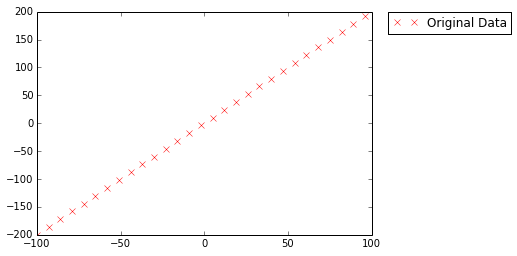

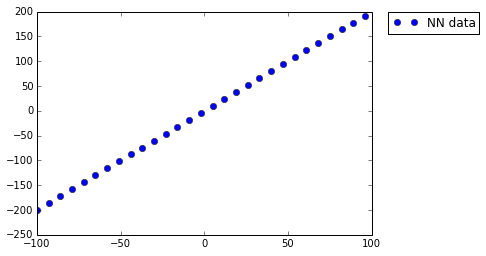

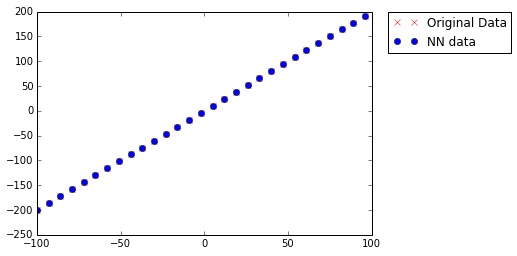

In [15]:
#création du domaine et de l'image à tester
x_test = range(-100,100,7) 
y_test = [2*x for x in x_test]

# prévisions émises par le modèle.
y_prev = modele.predict(x_test)

# création du graphique
plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# graphique superposant les données originales et obtenues
plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Et voilà ! Nous avons réussi notre premier réseau de neurones artificiel sur des données synthétiques. :D

Nous pouvons  maintenant nous poser la question du rôle joué par les différents paramètres sur la qualité de l'apprentissage obtenu.

# Étape 3 : Tests

Avant de procéder à nos tests, commençons par nous créer une fonction qui résumera les trois étapes (entraînement, prévision, graphiques) qui nous intéressent.




In [43]:
def test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test):
    modele = modele_de_base()
    # génération d'un intervalle sur lequel la fonction f(x) est définie:
    xs = range(train_from,train_to,interval_train)

    # génération de l'image de la fonction sur cet intervalle:
    ys = [2* x for x in xs]
    
    modele.fit(xs, ys, epochs=epoques, batch_size=echantil)
    
    #création du domaine et de l'image à tester
    x_test = range(test_from,test_to,interval_test) 
    y_test = [2*x for x in x_test]

    # prévisions émises par le modèle.
    y_prev = modele.predict(x_test)

    # création du graphique
    plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    # graphique superposant les données originales et obtenues
    plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
    plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    


## Taille des échantillons

Commençons par voir ce qui arrive si nous utilisons des échantillons ( $batch__size$ ) plus grands pour entraîner le réseau.

Epoch 1/20
200/200 [==============================] - 0s 2ms/step - loss: 639211.2781
Epoch 2/20
200/200 [==============================] - 0s 182us/step - loss: 576414.9750
Epoch 3/20
200/200 [==============================] - 0s 160us/step - loss: 515931.7656
Epoch 4/20
200/200 [==============================] - 0s 171us/step - loss: 458560.2375
Epoch 5/20
200/200 [==============================] - 0s 151us/step - loss: 404837.3937
Epoch 6/20
200/200 [==============================] - 0s 164us/step - loss: 353098.8469
Epoch 7/20
200/200 [==============================] - 0s 145us/step - loss: 307172.1859
Epoch 8/20
200/200 [==============================] - 0s 151us/step - loss: 264600.5938
Epoch 9/20
200/200 [==============================] - 0s 161us/step - loss: 225879.8086
Epoch 10/20
200/200 [==============================] - 0s 155us/step - loss: 190823.6844
Epoch 11/20
200/200 [==============================] - 0s 198us/step - loss: 158113.4805
Epoch 12/20
200/200 [===========

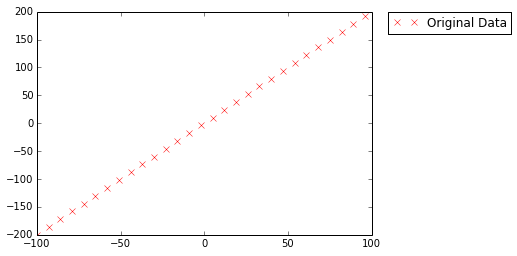

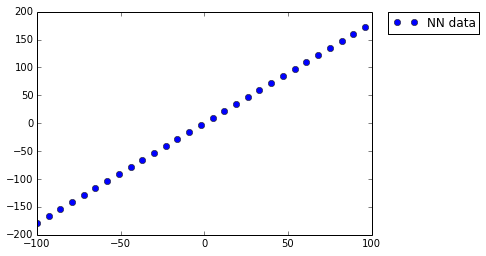

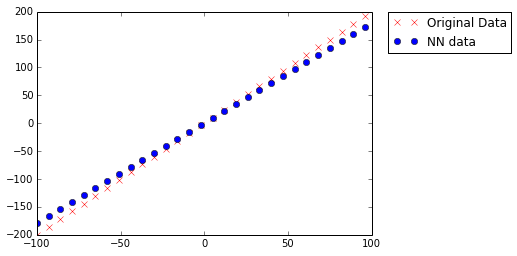

In [45]:
# test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test)
test_nn(20, 20, -1000, 1000, 10, -100, 100, 7)

Nous observons que la valeur de la fonction de perte ne diminue apparemment pas aussi rapidement que pour l'exemple où la taille des échantillons était plus petite. 


Dans ce cas, est-ce qu'augmenter le nombre d'époques d'entraînement améliore les résultats obtenus ? Testons.

Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 1254404.7437
Epoch 2/50
200/200 [==============================] - 0s 195us/step - loss: 1171225.1438
Epoch 3/50
200/200 [==============================] - 0s 156us/step - loss: 1088462.1938
Epoch 4/50
200/200 [==============================] - 0s 158us/step - loss: 1011193.8250
Epoch 5/50
200/200 [==============================] - 0s 144us/step - loss: 933201.7625
Epoch 6/50
200/200 [==============================] - 0s 151us/step - loss: 860293.9500
Epoch 7/50
200/200 [==============================] - 0s 148us/step - loss: 786139.6875
Epoch 8/50
200/200 [==============================] - 0s 146us/step - loss: 721386.1937
Epoch 9/50
200/200 [==============================] - ETA: 0s - loss: 446059.50 - 0s 176us/step - loss: 653946.2625
Epoch 10/50
200/200 [==============================] - 0s 185us/step - loss: 593743.5375
Epoch 11/50
200/200 [==============================] - 0s 177us/step - loss: 534014.7594


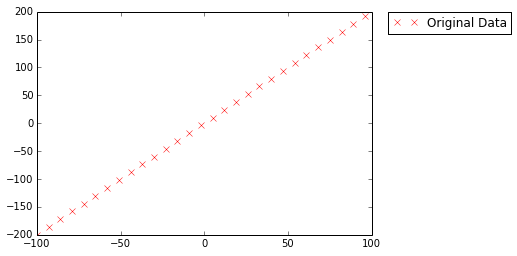

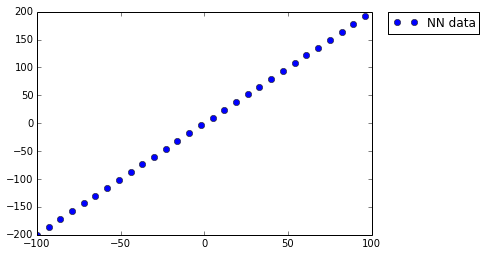

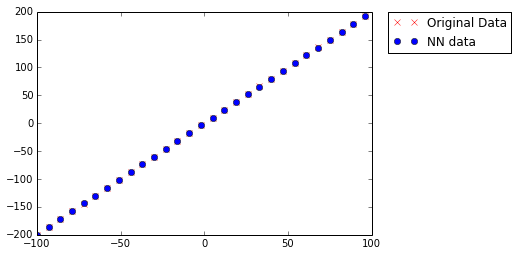

In [46]:
# test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test)
test_nn(50, 20, -1000, 1000, 10, -100, 100, 7)

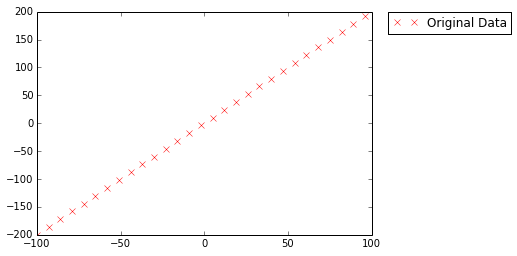

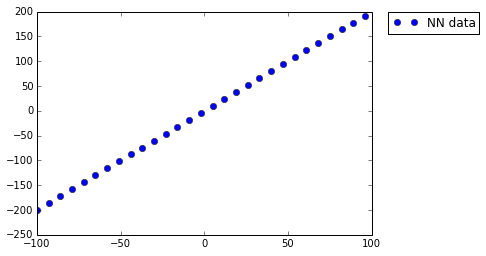

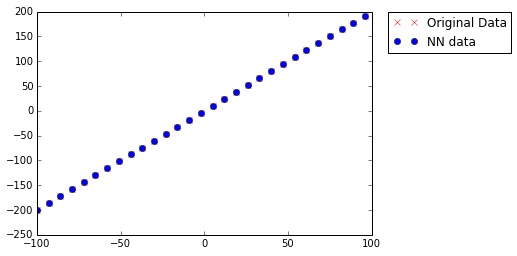

In [27]:
#création du domaine et de l'image à tester
x_test = range(-100,100,7) 
y_test = [2*x for x in x_test]

# prévisions émises par le modèle.
y_prev = modele2.predict(x_test)

# création du graphique
plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# graphique superposant les données originales et obtenues
plt1 = plt.plot(x_test, y_test, 'rx', label = 'Original Data')
plt2 = plt.plot(x_test, y_prev, 'bo', label = 'NN data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Dans ce cas, augmenter le nombre d'époques lorsque nous avons des échantillons de taille plus grande améliore les résultats.

Jusqu'à présent, nous nous sommes intéressés au potentiel de généralisation lorsque nous évaluons le réseau de neurones sur des données comprises sur le domaine d'entraînement du réseau, mais non dans l'ensemble de données d'entraînement.

## Généralisation

Qu'arrive-t-il si nous exécutons le modèle neuronal sur des données situées en-dehors du domaine d'entraînement du réseau ? Est-ce que le réseau est capable de généraliser la fonction ? Testons.

Epoch 1/20
200/200 [==============================] - 0s 2ms/step - loss: 384321.0078
Epoch 2/20
200/200 [==============================] - 0s 156us/step - loss: 320142.7578
Epoch 3/20
200/200 [==============================] - 0s 155us/step - loss: 264290.9734
Epoch 4/20
200/200 [==============================] - 0s 154us/step - loss: 215227.7391
Epoch 5/20
200/200 [==============================] - 0s 168us/step - loss: 171610.8586
Epoch 6/20
200/200 [==============================] - 0s 163us/step - loss: 135832.5781
Epoch 7/20
200/200 [==============================] - 0s 179us/step - loss: 106010.7102
Epoch 8/20
200/200 [==============================] - 0s 178us/step - loss: 80602.2937
Epoch 9/20
200/200 [==============================] - 0s 172us/step - loss: 61009.5824
Epoch 10/20
200/200 [==============================] - 0s 153us/step - loss: 45276.6336
Epoch 11/20
200/200 [==============================] - 0s 188us/step - loss: 32630.1020
Epoch 12/20
200/200 [===============

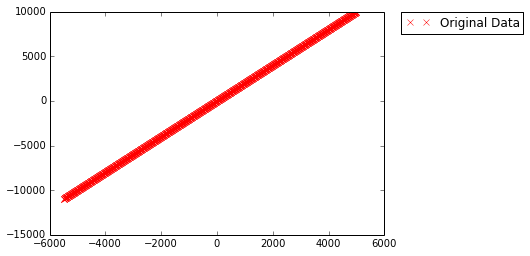

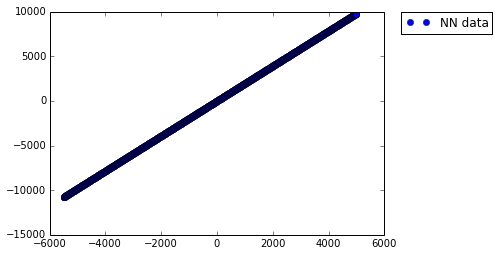

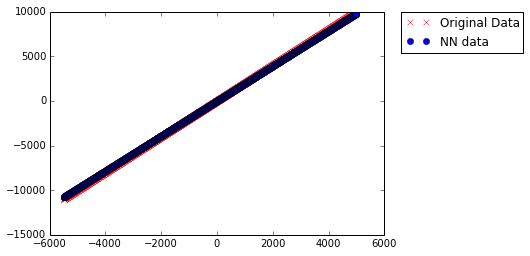

In [47]:
# test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test)
test_nn(20, 20, -1000, 1000, 10, -5500, 5000, 7)

Le réseau semble être capable de généraliser, pour cet exemple spécifique.

## Test lorsque les données sur l'ensemble d'entraînement sont plus éloignées

Qu'arrive-t-il si nous éloignons les données du domaine d'entraînement les unes des autres ? Testons.

Epoch 1/10
131/131 [==============================] - 1s 4ms/step - loss: 81508224.1527
Epoch 2/10
131/131 [==============================] - 0s 497us/step - loss: 65287491.1450
Epoch 3/10
131/131 [==============================] - 0s 569us/step - loss: 51697235.1908
Epoch 4/10
131/131 [==============================] - 0s 545us/step - loss: 39873958.2901
Epoch 5/10
131/131 [==============================] - 0s 540us/step - loss: 30030107.5802
Epoch 6/10
131/131 [==============================] - 0s 608us/step - loss: 21651019.5153
Epoch 7/10
131/131 [==============================] - 0s 514us/step - loss: 14972979.8397
Epoch 8/10
131/131 [==============================] - 0s 501us/step - loss: 9837485.9656
Epoch 9/10
131/131 [==============================] - 0s 503us/step - loss: 6145521.3206
Epoch 10/10
131/131 [==============================] - 0s 476us/step - loss: 3588939.7424


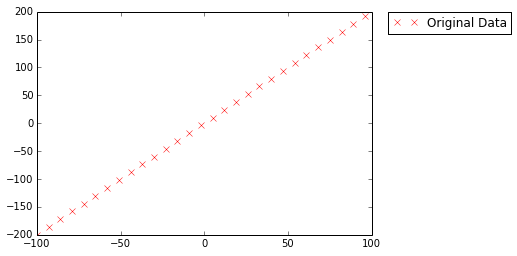

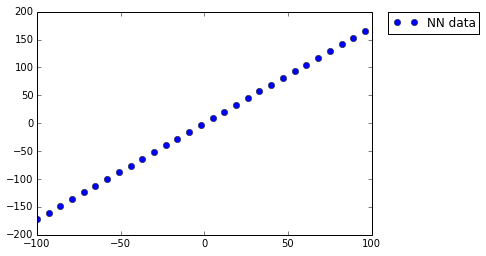

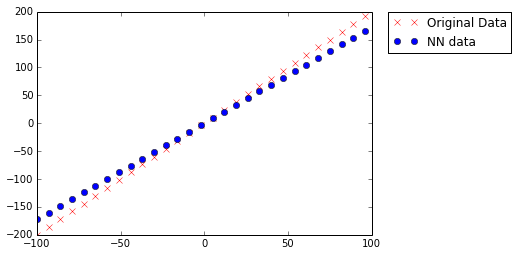

In [48]:
# test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test)
test_nn(10, 5, -10000, 10000, 153, -100, 100, 7)

### Généralisation

Est-ce que le réseau est encore capable de généraliser ?

Epoch 1/10
131/131 [==============================] - 1s 4ms/step - loss: 271076596.7634
Epoch 2/10
131/131 [==============================] - 0s 492us/step - loss: 234454992.7939
Epoch 3/10
131/131 [==============================] - 0s 525us/step - loss: 202212746.3206
Epoch 4/10
131/131 [==============================] - ETA: 0s - loss: 172633462.956 - 0s 483us/step - loss: 172395098.3817
Epoch 5/10
131/131 [==============================] - 0s 516us/step - loss: 146267435.0534
Epoch 6/10
131/131 [==============================] - 0s 586us/step - loss: 123577665.4656
Epoch 7/10
131/131 [==============================] - 0s 474us/step - loss: 103636577.6183
Epoch 8/10
131/131 [==============================] - 0s 489us/step - loss: 85447861.8473
Epoch 9/10
131/131 [==============================] - 0s 493us/step - loss: 69472462.1202
Epoch 10/10
131/131 [==============================] - 0s 557us/step - loss: 55510166.1947


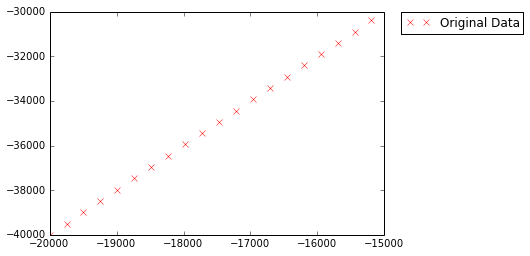

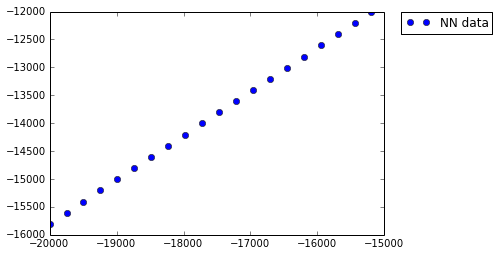

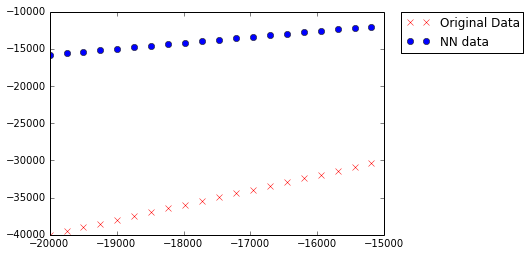

In [49]:
# test_nn(epoques, echantil, train_from, train_to, interval_train, test_from, test_to, interval_test)
test_nn(10, 5, -10000, 10000, 153, -20000, -15000, 253)